# Run the demo on the handtool dataset

## Modules

notebook à mettre en amont du dataset path

In [1]:
from skimage.io import imread
from PIL import Image
import os,sys
import numpy as np 
import matplotlib.pyplot as plt
import cPickle
import json
dataset_path = 'handtool_videos/'
dossiers = ['barbell','hammer','scythe']

In [5]:
# compter tous les fichiers dans barbell_0002
def open_frames(path):
    for dossier, sous_dossiers, fichiers in os.walk(path):
        print (sous_dossiers)
        count = 0
        for num, fichier in enumerate(fichiers):
            full_path = os.path.join(dossier, fichier)
            if '.jpg' in full_path:
                img = imread(full_path)
                if count == 0:
                    print(full_path)
                    plt.imshow(img)
                    plt.show()
                count +=1



1
['openpose', 'frames', 'JSON']
0
[]
./handtool_videos/barbell/barbell_0002/openpose/000047.jpg


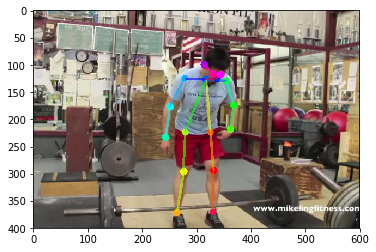

263
[]
./handtool_videos/barbell/barbell_0002/frames/000047.jpg


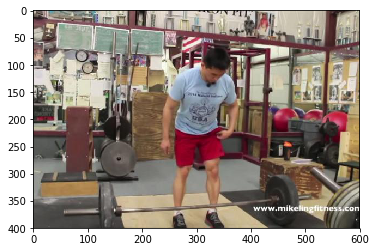

263
['JSON']
0
[]
0


In [8]:
open_frames(dataset_path+'barbell/barbell_0002')

In [4]:
def write_json(path,fichier):
    # path for json files per image
    if not os.path.isdir(path+'/JSON'):
        os.makedirs(path+'/JSON')
    # load openpose
    data = cPickle.load(open(path+'/'+fichier,"rb"))
    var = data.keys()
    json_template = {"version":1.2,"people": 
        [{"pose_keypoints":[],"face_keypoints_2d":[], 
          "hand_left_keypoints_2d":[],"hand_right_keypoints_2d":[], 
          "pose_keypoints_3d":[],"face_keypoints_3d":[], 
          "hand_left_keypoints_3d":[], 
          "hand_right_keypoints_3d":[]}]} 
    #output par image
    count = 0
    for i in range(len(data[var[0]])): 
        output = os.path.join(path, 'JSON/json_'+str(i)+'.json')
        print(output)
        value = json_template
        #for val in data[var[0]][i]: on a qu'une seule personne à chaque fois
        print(data[var[0]][i])
        val = data[var[0]][i]
        for j in range(len(val)):
            for k in range(len(val[j])):
                value['people'][0]['pose_keypoints'].append(val[j][k])
        with open(output, 'w') as outfile:
            json.dump(value, outfile)
            outfile.close()
        count+=1
    print('done!',count)

#write_json(os.getcwd(),"openpose.pkl")

In [22]:
# le faire pour tous les dossiers -  
def transform_json(dataset_path, dossier):
    for doss in dossier:
        path = os.path.join(dataset_path,doss)
        sous_dossier = []
        for val, sous_dossiers, fichiers in os.walk(path):
            full_path = os.path.join(path, val)
            sous_dossier.append(os.path.split(os.path.dirname(full_path))[1])
        sous_dossier = list(set(sous_dossier))
        for k in sous_dossier:
            if doss+'_' in k:
                print(k)
                new_path = os.path.join(path,k)
                open_frames(new_path+'/frames')
                write_json(new_path,"openpose.pkl")

barbell_0010
[]
./handtool_videos/barbell/barbell_0010/frames/000047.jpg


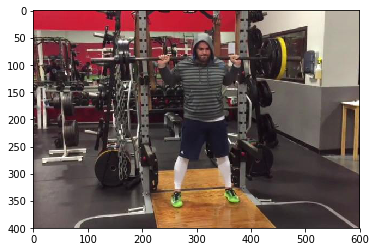

171
barbell_0008
[]
./handtool_videos/barbell/barbell_0008/frames/000047.jpg


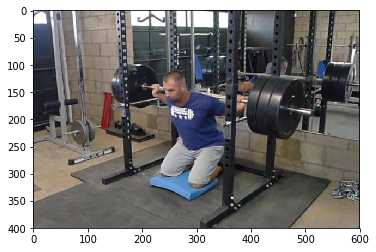

169
barbell_0003
[]
./handtool_videos/barbell/barbell_0003/frames/000047.jpg


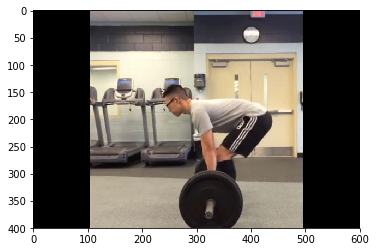

164
barbell_0002
[]
./handtool_videos/barbell/barbell_0002/frames/000047.jpg


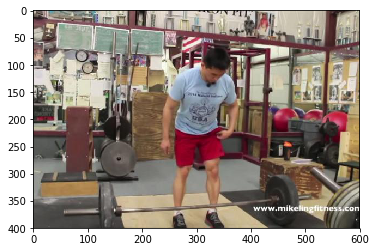

263
barbell_0007
[]
./handtool_videos/barbell/barbell_0007/frames/000047.jpg


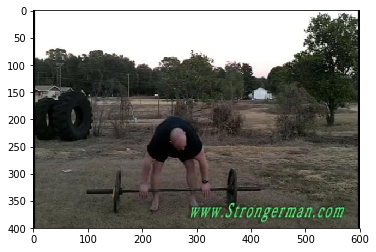

195
hammer_0003
[]
./handtool_videos/hammer/hammer_0003/frames/000047.jpg


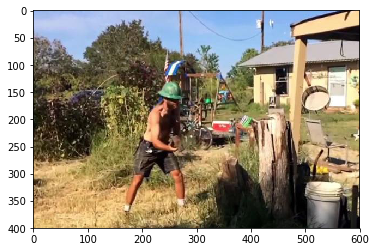

210
hammer_0001
[]
./handtool_videos/hammer/hammer_0001/frames/000047.jpg


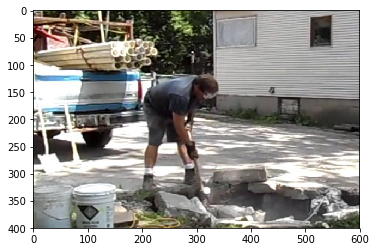

145
hammer_0006
[]
./handtool_videos/hammer/hammer_0006/frames/000047.jpg


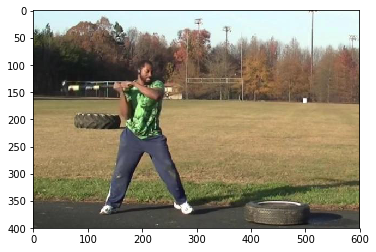

209
hammer_0007
[]
./handtool_videos/hammer/hammer_0007/frames/000047.jpg


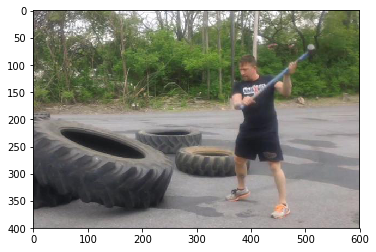

192
hammer_0010
[]
./handtool_videos/hammer/hammer_0010/frames/000047.jpg


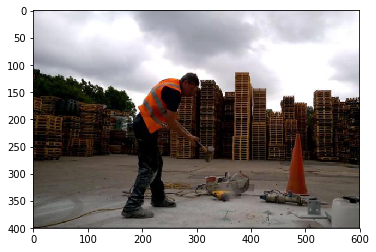

205
scythe_0001
[]
./handtool_videos/scythe/scythe_0001/frames/000047.jpg


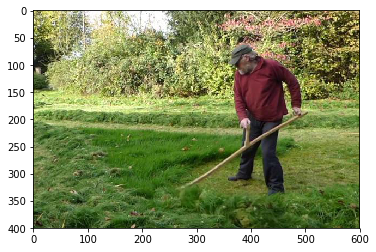

185
scythe_0002
[]
./handtool_videos/scythe/scythe_0002/frames/000047.jpg


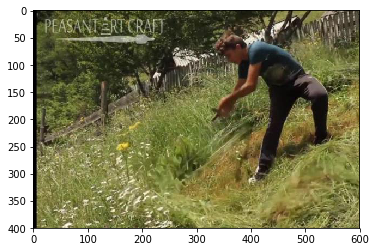

104
scythe_0003
[]
./handtool_videos/scythe/scythe_0003/frames/000047.jpg


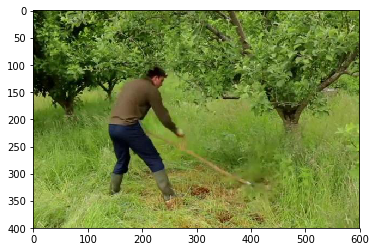

114
scythe_0005
[]
./handtool_videos/scythe/scythe_0005/frames/000047.jpg


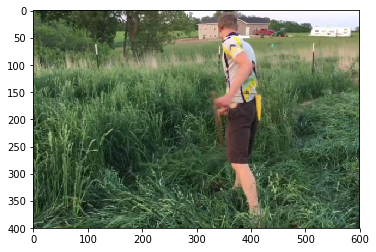

99
scythe_0006
[]
./handtool_videos/scythe/scythe_0006/frames/000047.jpg


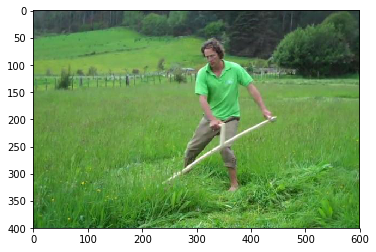

138


In [23]:
transform_json(dataset_path,dossiers)

In [2]:
import tensorflow as tf

In [6]:
img_path = os.path.join(dataset_path,'barbell/barbell_0002/frames/000047.jpg')
print(img_path)
json_path = os.path.join(dataset_path,'barbell/barbell_0002/JSON/json_47.json')
!python demo2.py img_path json_path

handtool_videos/barbell/barbell_0002/frames/000047.jpg
2020-01-05 17:23:09.810267: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2020-01-05 17:23:09.810294: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2020-01-05 17:23:09.810302: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2020-01-05 17:23:09.810308: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX2 instructions, but these are available on your machine and could speed up CPU computations.
2020-01-05 17:23:09.810314: W tensorflow/core/platform

In [12]:
import subprocess
subprocess.Popen(['python','-m', 'demo2.py', '--img_path', img_path, '--json_path', 'json_path'])

In [13]:
os.chdir(os.path.join(dataset_path,'barbell/barbell_0002/frames'))
!ls

000000.jpg  000053.jpg	000106.jpg  000159.jpg	000212.jpg
000001.jpg  000054.jpg	000107.jpg  000160.jpg	000213.jpg
000002.jpg  000055.jpg	000108.jpg  000161.jpg	000214.jpg
000003.jpg  000056.jpg	000109.jpg  000162.jpg	000215.jpg
000004.jpg  000057.jpg	000110.jpg  000163.jpg	000216.jpg
000005.jpg  000058.jpg	000111.jpg  000164.jpg	000217.jpg
000006.jpg  000059.jpg	000112.jpg  000165.jpg	000218.jpg
000007.jpg  000060.jpg	000113.jpg  000166.jpg	000219.jpg
000008.jpg  000061.jpg	000114.jpg  000167.jpg	000220.jpg
000009.jpg  000062.jpg	000115.jpg  000168.jpg	000221.jpg
000010.jpg  000063.jpg	000116.jpg  000169.jpg	000222.jpg
000011.jpg  000064.jpg	000117.jpg  000170.jpg	000223.jpg
000012.jpg  000065.jpg	000118.jpg  000171.jpg	000224.jpg
000013.jpg  000066.jpg	000119.jpg  000172.jpg	000225.jpg
000014.jpg  000067.jpg	000120.jpg  000173.jpg	000226.jpg
000015.jpg  000068.jpg	000121.jpg  000174.jpg	000227.jpg
000016.jpg  000069.jpg	000122.jpg  000175.jpg	000228.jpg
000017.jpg  000070.jpg	000123.j